In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Obtain Data
The stock price data will be obtained through Yahoo Finance throughout the course.

In [18]:
import yfinance as yf

# Get the data for the stock AAPL
ford = yf.download('F','2018-01-01', datetime.today(), progress=False)['Adj Close']
ge = yf.download('GE','2016-01-01', datetime.today(), progress=False)['Adj Close']

Quick visualizations

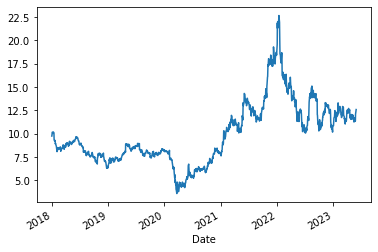

In [19]:
ford.plot();

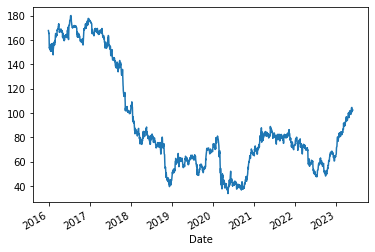

In [10]:
ge.plot();

## Merging series
**Exercise 1**: Consolidate the Data of Ford and GE into one single DataFrame based on the date index.

In [52]:
data = pd.concat([ford.rename('ford'), ge.rename('ge')], axis=1)
data

,ford,ge
Date,,
2015-12-31,NaN,167.678940
2016-01-04,NaN,165.310471
2016-01-05,NaN,165.471954
2016-01-06,NaN,162.834305
2016-01-07,NaN,155.944092
...,...,...
2023-05-23,11.73,101.699997
2023-05-24,11.33,100.980003
2023-05-25,11.38,101.519997


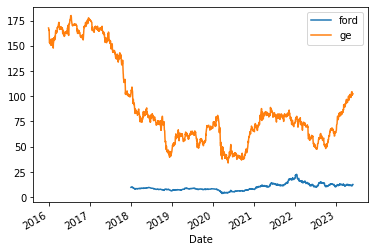

In [53]:
data.plot();

**Exercise 2**: Remove all the entries where there are missing values

In [54]:
data.dropna(inplace=True)

In [55]:
data

,ford,ge
Date,,
2018-01-02,9.749650,103.178185
2018-01-03,9.826664,104.153732
2018-01-04,9.996087,106.334335
2018-01-05,10.165513,106.391708
2018-01-08,10.127007,104.899734
...,...,...
2023-05-23,11.730000,101.699997
2023-05-24,11.330000,100.980003
2023-05-25,11.380000,101.519997


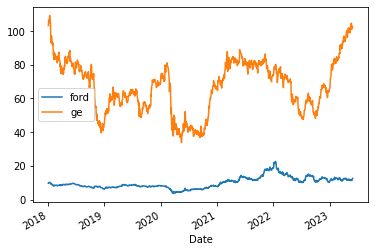

In [56]:
data.plot();

**Exercise**: What values do you have for Jan 8th, 2021 ?

In [57]:
data.loc['2021-01-08']

ford     8.057256
ge      70.229095
Name: 2021-01-08 00:00:00, dtype: float64

## Financial Analysis
**Exercise**: calculate the difference between the return of GE and Ford

In [61]:
data = data.pct_change()
data['difference'] = data['ford'] - data['ge']
data

,ford,ge,difference
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.007899,0.009455,-0.001556
2018-01-04,0.017241,0.020936,-0.003695
2018-01-05,0.016949,0.000540,0.016410
2018-01-08,-0.003788,-0.014023,0.010236
...,...,...,...
2023-05-23,0.008598,-0.027260,0.035858
2023-05-24,-0.034101,-0.007080,-0.027021
2023-05-25,0.004413,0.005348,-0.000934


**Exercise**: obtain the log returns for both assets (log(1+x))

In [62]:
data['log_return_ford'] = data['ford'].apply(lambda x: np.log(1 + x))
data['log_return_ge'] = data['ge'].apply(lambda x: np.log(1 + x))
data

,ford,ge,difference,log_return_ford,log_return_ge
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.007899,0.009455,-0.001556,0.007868,0.009411
2018-01-04,0.017241,0.020936,-0.003695,0.017094,0.020720
2018-01-05,0.016949,0.000540,0.016410,0.016807,0.000539
2018-01-08,-0.003788,-0.014023,0.010236,-0.003795,-0.014123
...,...,...,...,...,...
2023-05-23,0.008598,-0.027260,0.035858,0.008562,-0.027638
2023-05-24,-0.034101,-0.007080,-0.027021,-0.034696,-0.007105
2023-05-25,0.004413,0.005348,-0.000934,0.004403,0.005333


**Exercise**: compute the rolling window volatility (annualized) using a window size of 20

In [72]:
data['Ford_volatility'] = data.rolling(window=20)['log_return_ford'].apply(lambda x: np.std(x)*(250**0.5))
data['GE_volatility'] = data.rolling(window=20)['log_return_ge'].apply(lambda x: np.std(x)*(250**0.5))
df_returns = data 

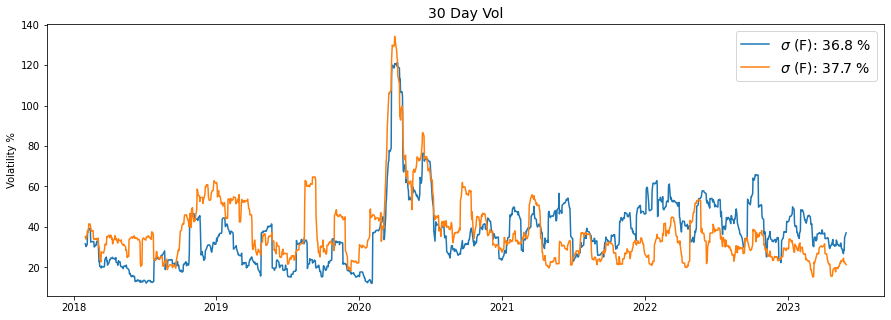

In [73]:
fig , ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(df_returns.index, df_returns['Ford_volatility']*100,
        label='$\sigma$ (F): '+ str(100*np.round(df_returns['Ford_volatility'].mean(),3))+ ' %')
ax.plot(df_returns.index, df_returns['GE_volatility']*100,
        label='$\sigma$ (F): '+ str(100*np.round(df_returns['GE_volatility'].mean(),3))+ ' %')

ax.set_title('30 Day Vol',fontsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('Volatility %');

**Exercise**: compute the rolling correlation (window size=100)

In [74]:
df_returns.dropna(how='any',inplace=True)

<AxesSubplot:xlabel='Date'>

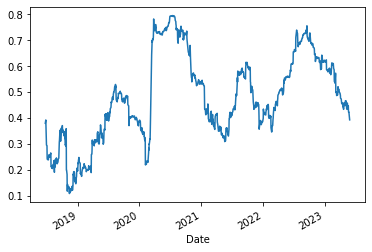

In [75]:
df_returns['corr'] = df_returns['ford'].rolling(window=100).corr(df_returns['ge'])
df_returns['corr'].plot()